<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Program%204%20-%20Data%20Visualization%3A%20PCA/Ron_Program4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Visualization: PCA**


Apply PCA on a dataset of your choice and reduce the dimension to 2. Visualize the dataset in a graph after applying PCA.

The dataset is taken from https://www.kaggle.com/nyjoey/youtube-stats?select=CAvideos.csv

## **Trending Youtube Video Statistics**

In [ ]:
import pandas as pd 
yt_df = pd.read_csv('CAvideos.csv',  encoding='utf-8')
yt_df.head(10)
yt_df.shape()

TypeError: ignored

In [ ]:
# Transforming Trending date column to datetime format
yt_df['trending_date'] = pd.to_datetime(yt_df['trending_date'], format='%y.%d.%m').dt.date

# Transforming Trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(yt_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
yt_df['publish_date'] = publish_time.dt.date
yt_df['publish_time'] = publish_time.dt.time
yt_df['publish_hour'] = publish_time.dt.hour

In [ ]:
yt_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-10,17
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,2017-11-13,17
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017-11-09,11
5,0yIWz1XEeyc,2017-11-14,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,07:37:51,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,2017-11-13,7
6,_uM5kFfkhB8,2017-11-14,Vanoss Superhero School - New Students,VanossGaming,23,23:52:13,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,2017-11-12,23
7,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17
8,JzCsM1vtn78,2017-11-14,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,20:19:24,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,2017-11-12,20
9,43sm-QwLcx4,2017-11-14,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,14:10:46,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,2017-11-10,14


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['views', 'likes', 'dislikes', 'comment_count']
x = yt_df.loc[:, features].values
print(x[:3])
y = yt_df.loc[:,['channel_title']].values
x = StandardScaler().fit_transform(x)
print(x[:3])
x.shape

[[17158579   787425    43420   125882]
 [ 1014651   127794     1688    13030]
 [ 3191434   146035     5339     8181]]
[[ 4.72195507  5.63609996  2.17858299  5.59990674]
 [-0.03904156  0.66480294 -0.01689779  0.37013371]
 [ 0.60291228  0.80227591  0.17517785  0.14542197]]


(40881, 4)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(3)

,principal component 1,principal component 2
0,9.266912,-1.874680
1,0.516975,-0.305365
2,0.881902,-0.362305


In [ ]:
finalDf = pd.concat([principalDf, yt_df[['channel_title']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,channel_title
0,9.266912,-1.874680,EminemVEVO
1,0.516975,-0.305365,iDubbbzTV
2,0.881902,-0.362305,Rudy Mancuso
3,0.814614,-0.387630,nigahiga
4,13.589445,-6.952569,Ed Sheeran


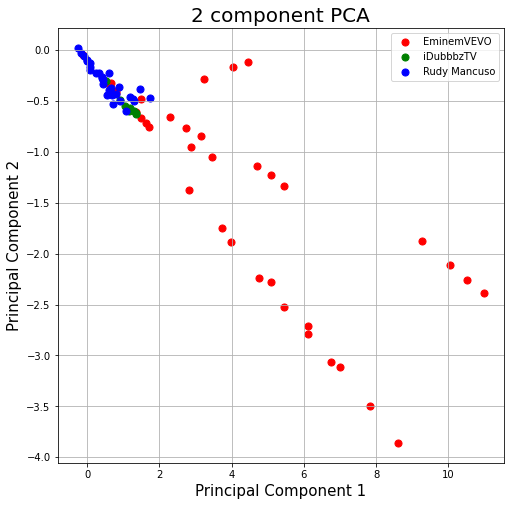

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['EminemVEVO', 'iDubbbzTV', 'Rudy Mancuso']
colors = ['r', 'g', 'b',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['channel_title'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()